## EDA_StockAnalysis_AMZN_and_competitors

In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas_datareader.data import DataReader
from datetime import datetime

In [20]:
# The tech stocks we'll be using are Apple, Google, Microsoft and Amazon
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for getting the stock data
for stock in tech_list:   
    globals()[stock] = DataReader(stock, 'yahoo', start, end)


In [21]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.sample(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-10-05,210.410004,206.979996,207.220001,210.380005,21331600.0,209.830658,MICROSOFT
2020-03-04,75.849998,73.282501,74.110001,75.684998,219178400.0,74.604240,APPLE
2020-06-22,200.759995,195.229996,195.789993,200.570007,32818900.0,199.563873,MICROSOFT
2020-09-08,3250.850098,3130.000000,3144.000000,3149.840088,6094200.0,3149.840088,AMAZON
2020-11-11,218.039993,212.199997,212.389999,216.550003,29440800.0,215.984543,MICROSOFT
2020-11-18,215.169998,210.929993,213.649994,211.080002,28372800.0,211.080002,MICROSOFT
2020-03-30,63.880001,62.349998,62.685001,63.702499,167976400.0,62.792850,APPLE
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.192863,APPLE
2020-06-03,1446.552002,1429.776978,1438.300049,1436.380005,1256200.0,1436.380005,GOOGLE


In [22]:
# Described Apple's stock data
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,93.220817,90.586673,91.870453,91.973149,1.468480e+08,91.400134
std,21.156994,20.538631,21.030790,20.816702,7.935550e+07,21.177212
min,57.125000,53.152500,57.020000,56.092499,2.019780e+07,55.291519
25%,75.231249,72.936251,74.072498,74.428749,9.966338e+07,73.335348
50%,87.357498,83.712502,86.577499,85.872498,1.310886e+08,85.570316
75%,115.982500,112.657499,114.520002,114.832500,1.842475e+08,114.634729
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,133.948898


In [5]:
# Information regarding Apple's stock
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-12-10 to 2020-12-10
Data columns (total 7 columns):
High            254 non-null float64
Low             254 non-null float64
Open            254 non-null float64
Close           254 non-null float64
Volume          254 non-null float64
Adj Close       254 non-null float64
company_name    254 non-null object
dtypes: float64(6), object(1)
memory usage: 15.9+ KB


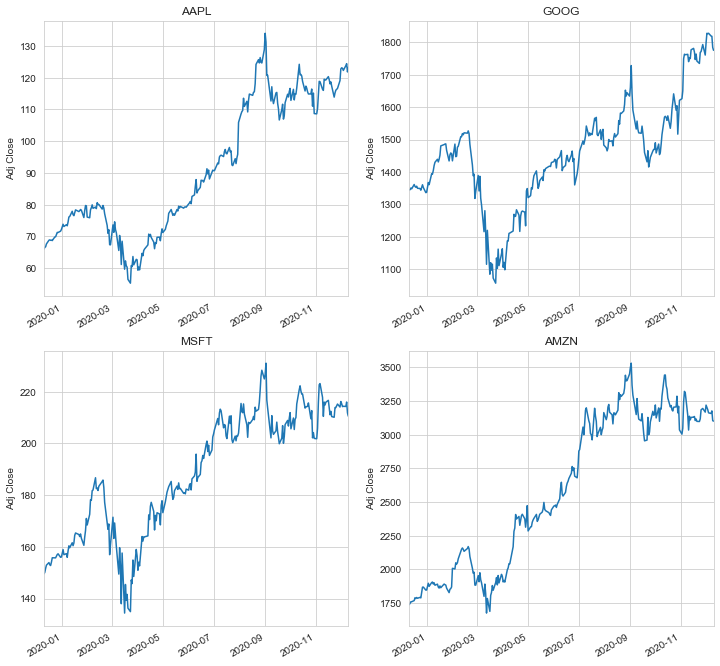

In [6]:
# To see a historical view of the closing price. For historical view we'll be using Adj. Closing price

plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

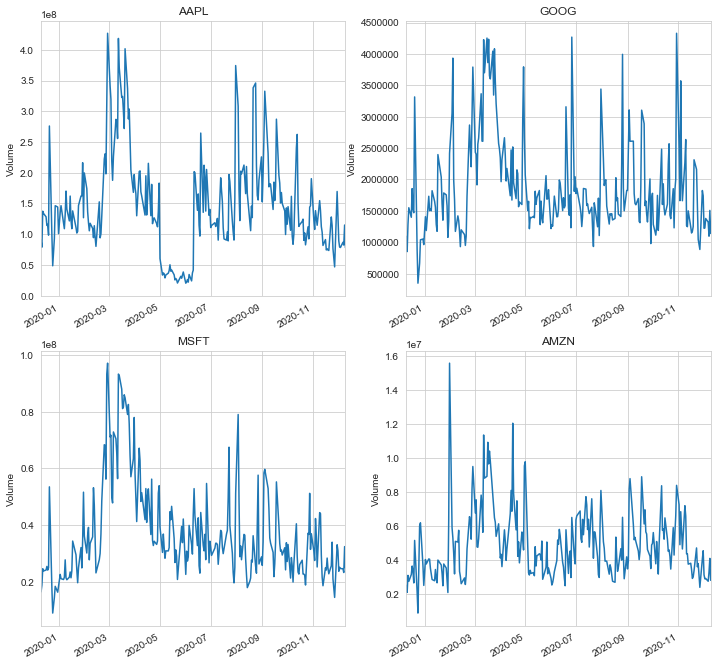

In [23]:
# For plotting the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

In [24]:
#Moving Average
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [37]:
print(AMZN.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return'],
      dtype='object')


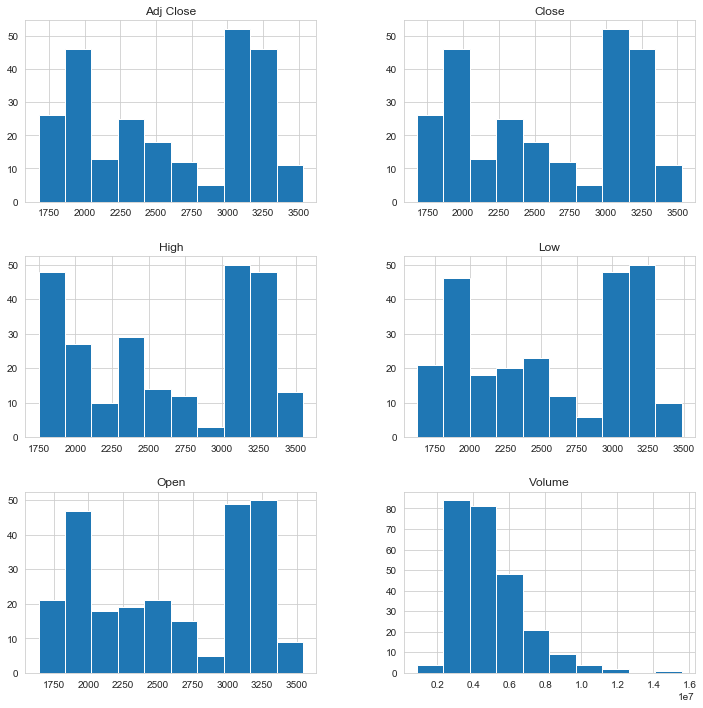

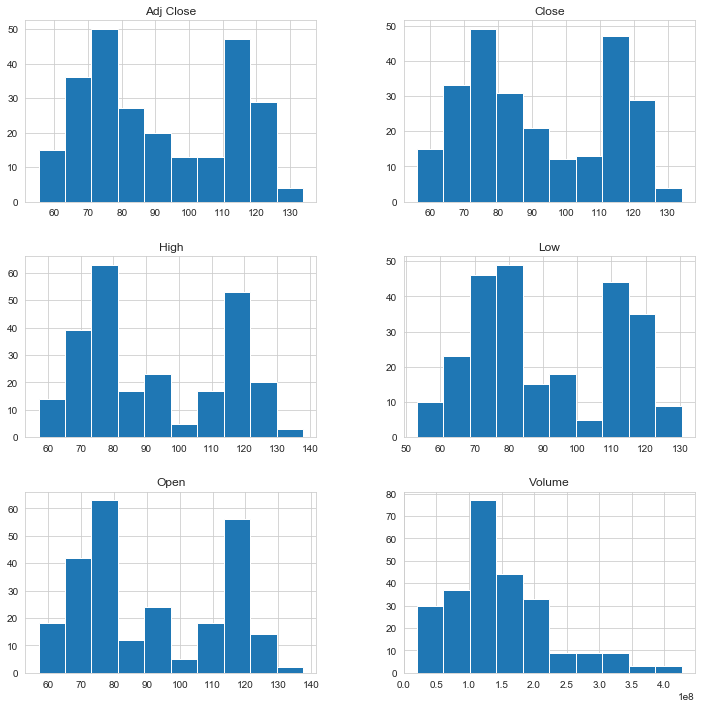

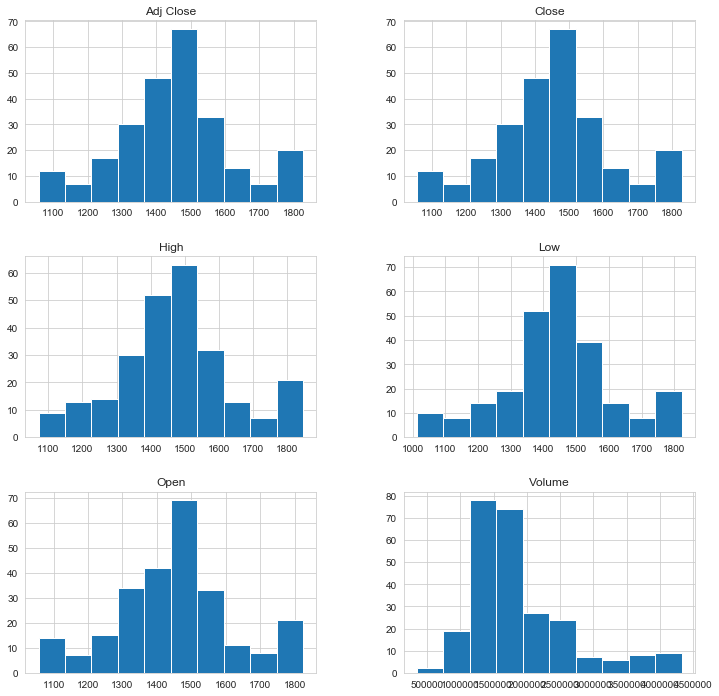

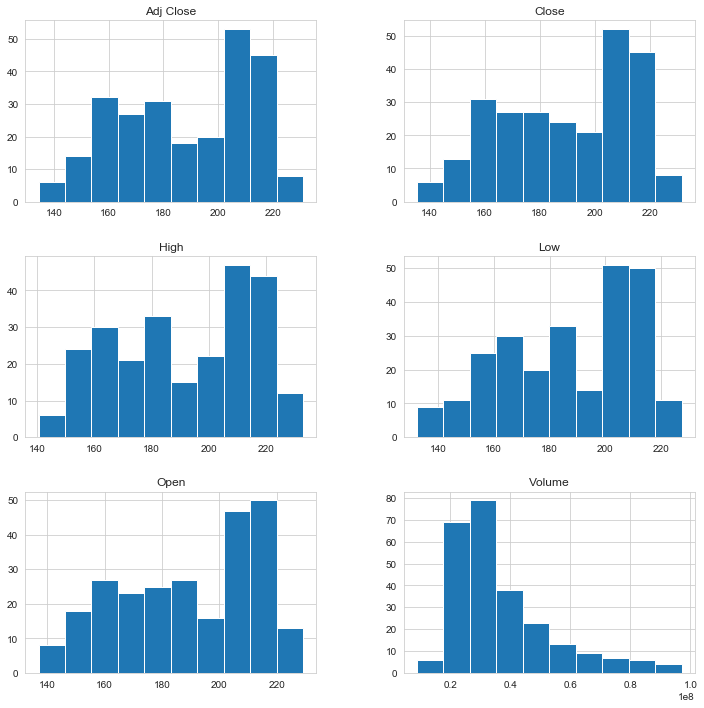

In [9]:
df.groupby("company_name").hist(figsize=(12, 12));

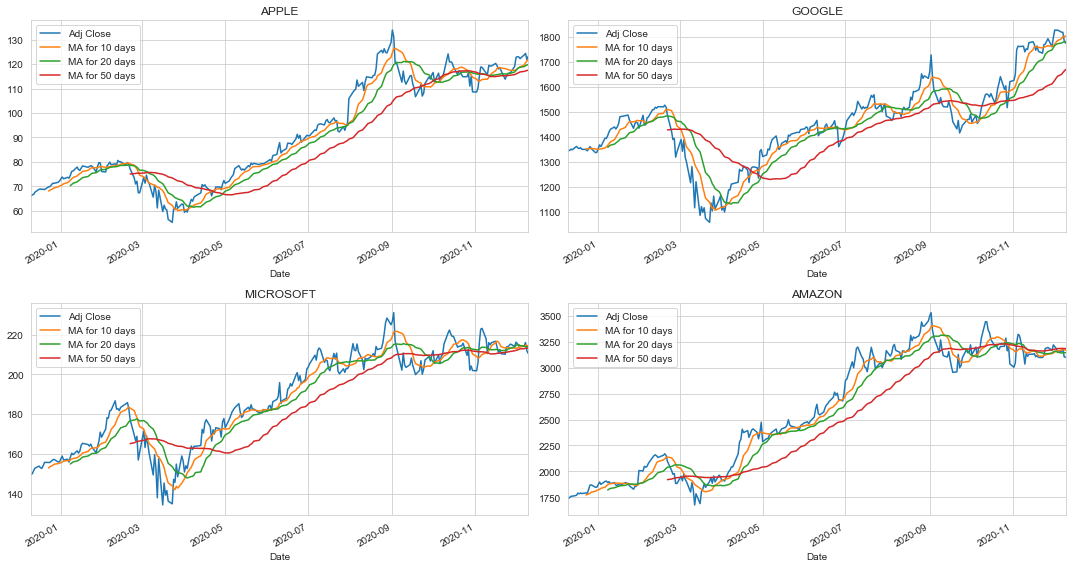

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

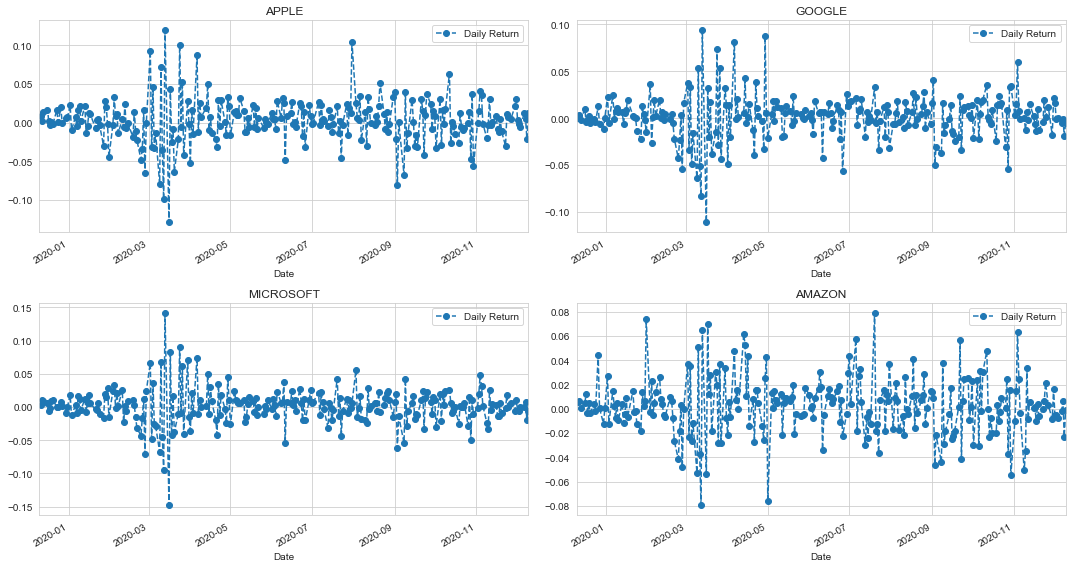

In [26]:
# We have used pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# To plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


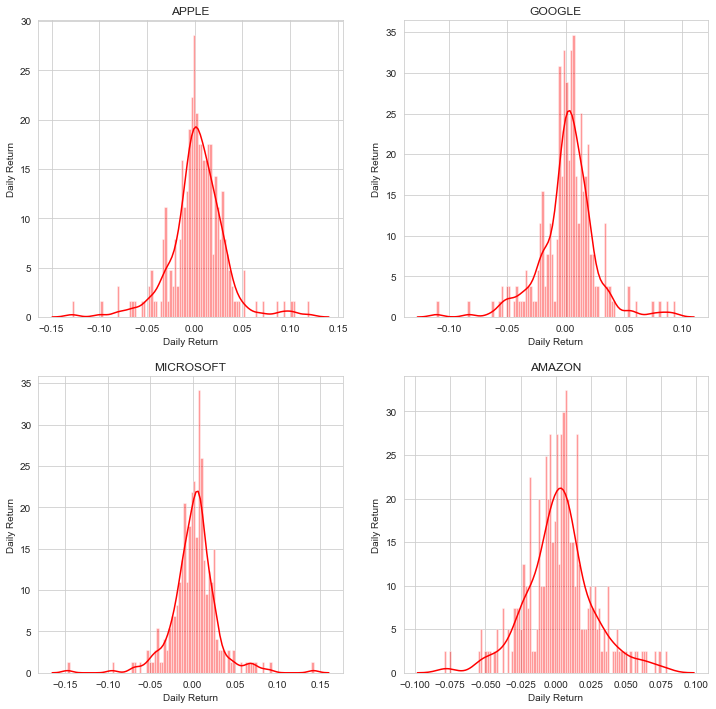

In [27]:
# To get a better view of above chart
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='red')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

In [28]:
# Creating a new DataFrame for Closing prices
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-10,66.004898,1344.660034,149.545792,1739.209961
2019-12-11,66.567886,1345.020020,150.109772,1748.719971
2019-12-12,66.737518,1350.270020,151.633667,1760.329956
2019-12-13,67.644707,1347.829956,152.910126,1760.939941
2019-12-16,68.802635,1361.170044,153.899643,1769.209961


In [29]:
# Making a new DataFrame for returns
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-12-10,NaN,NaN,NaN,NaN
2019-12-11,0.008529,0.000268,0.003771,0.005468
2019-12-12,0.002548,0.003903,0.010152,0.006639
2019-12-13,0.013593,-0.001807,0.008418,0.000347
2019-12-16,0.017118,0.009897,0.006471,0.004696


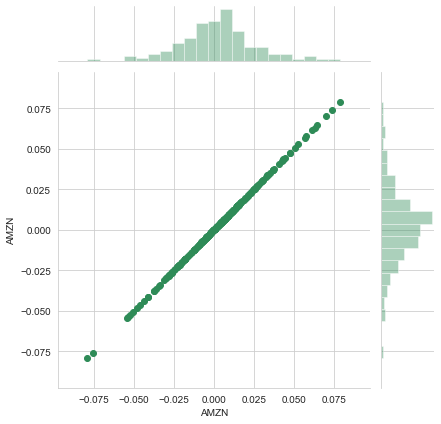

In [36]:
# Comparing AMAZON to itself should show a perfectly linear relationship
sns.jointplot('AMZN', 'AMZN', tech_rets, kind='scatter', color='seagreen')

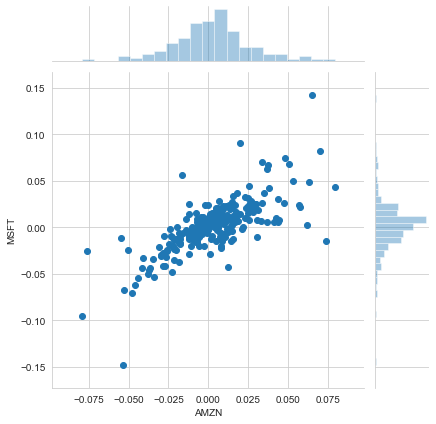

In [38]:
# To compare the daily returns of Google and Microsoft
sns.jointplot('AMZN', 'MSFT', tech_rets, kind='scatter')

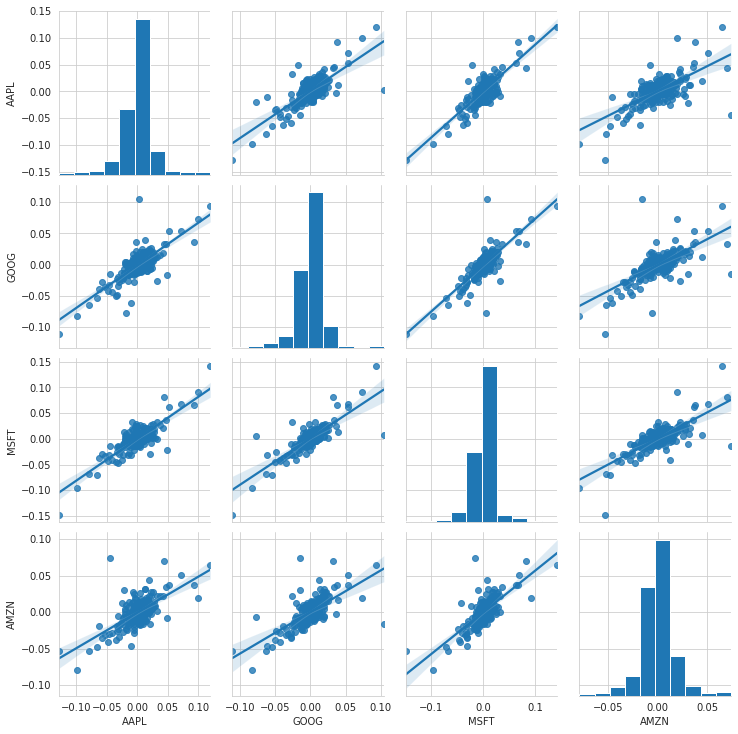

In [18]:
sns.pairplot(tech_rets, kind='reg')

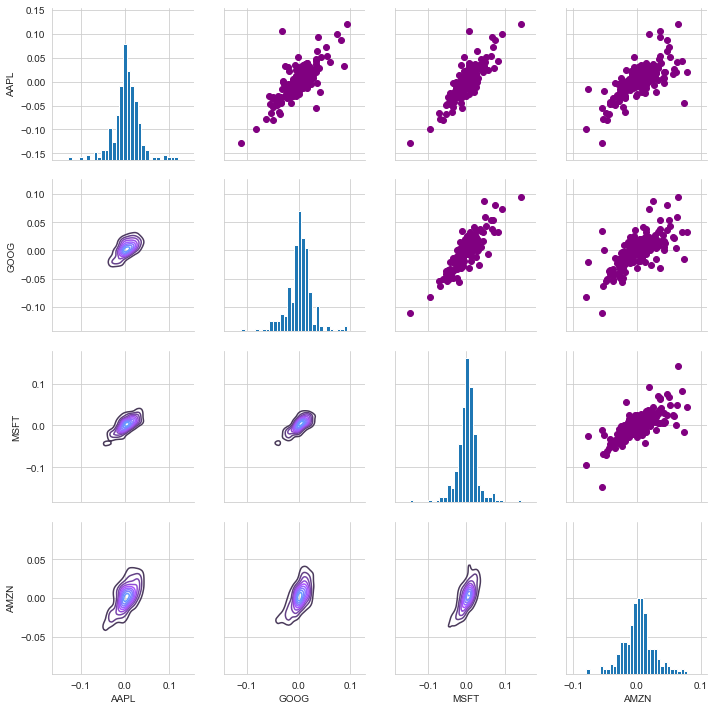

In [31]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

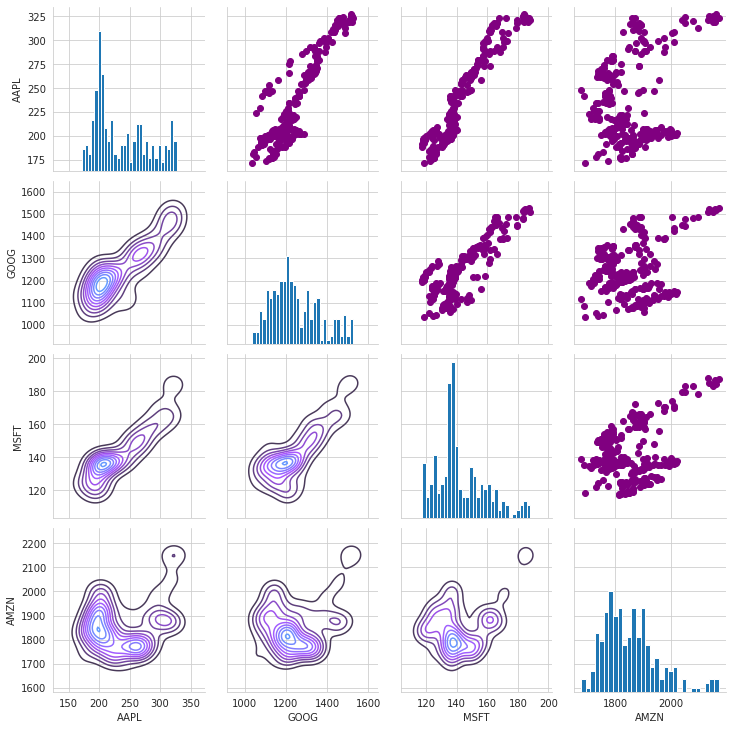

In [20]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

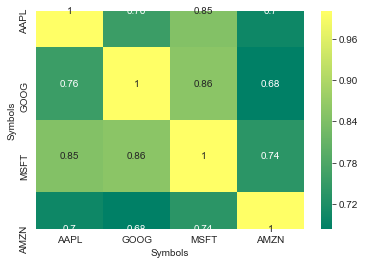

In [32]:
# Correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

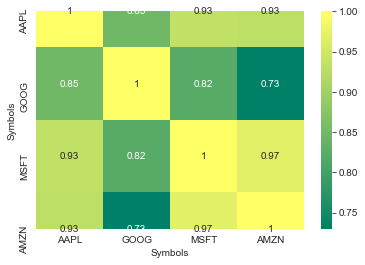

In [33]:
# Correlation plot for the closing price
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

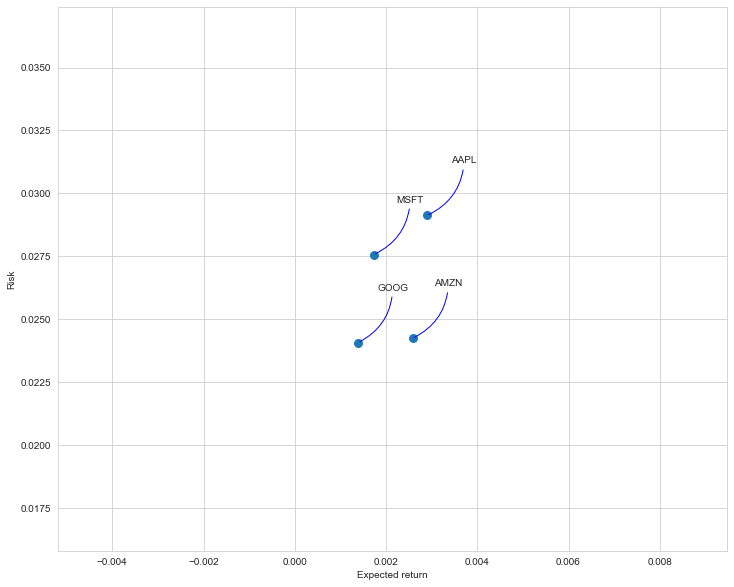

In [19]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))